### Loading the Data

* instant - id of the record (integer)
* dteday - date of the record (yr-month-day)
* season - season of the record (integer, 1-4)
* 1: Spring
* 2: Summer
* 3: Fall
* 4: Winter
* yr - year of the record(integer, 0-1)
* 0: 2011
* 1: 2012
* mth - month of the record (integer, 1-12)
* hr - hour of the record (integer, 0-23)
* holiday - whether the day is a holiday or not (integer, 0-1)
* weekday - day of the week (integer, 1-7)
* workingday - whether the day is a working day (neither holiday nor weekend) or not (integer, 0-1)
* wheathersit - weather situation (integer, 1-4)
* 1: clear, few clouds, or partly cloudy
* 2: mist (no precipitation)
* 3: light rain or light snow
* 4: heavy rain, hail, or snow.
* temp - temperature in Celsius, normalized by dividing by the highest temperature recorded over these two years (float, [0, 1]).
* atemp - apparent temperature in Celsius, normalized by dividing by the highest apparent temperature over these two years (float, [0, 1]). Apparent temperature quantifies the temperature perceived by humans, combining wind chill, humidity, and actual temperature.
* hum - percentage of humidity (float, [0, 1]).
* windspeed - wind speed, normalized by dividing by the highest speed recorded over these two years (float, [0, 1])
* cnt - number of bikes rented (integer) Train set only, value to predict.

In [147]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [179]:
# Load the features
X = np.loadtxt('data/train_transformed.csv', delimiter=',', 
               skiprows=1, usecols=range(0, 15))

print X.shape

(10886, 15)


In [182]:
# Load the features labels
Xl = np.loadtxt('data/labels.csv',dtype= str, delimiter=',',usecols=range(0,15))

print Xl.shape

(15,)


In [164]:
# Load the target 
y = np.loadtxt('data/train_transformed.csv', delimiter=',', 
               skiprows=1, usecols=[16])

print y.shape

(10886,)


In [165]:
# Load the test set
T = np.loadtxt('data/test_transformed.csv',  delimiter=',', 
               skiprows=1, usecols=range(0, 15))

print X.shape

(10886, 15)


### Variables Exploration

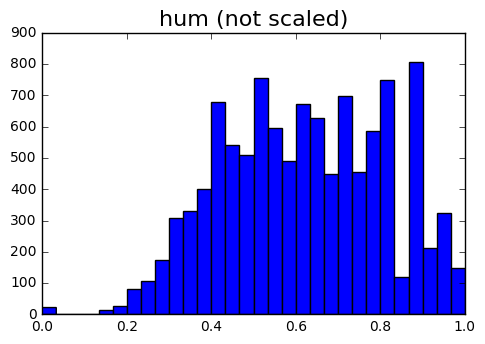

In [196]:
# Plot feature distribution

idx_1 = 14 # Feature number to be plotted
fig = plt.figure(figsize=(12, 8)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist(X[:, idx_1], bins=30, color='blue')
plt.title( '%s (not scaled)' % Xl[idx_1], fontsize=16)

Populating the interactive namespace from numpy and matplotlib


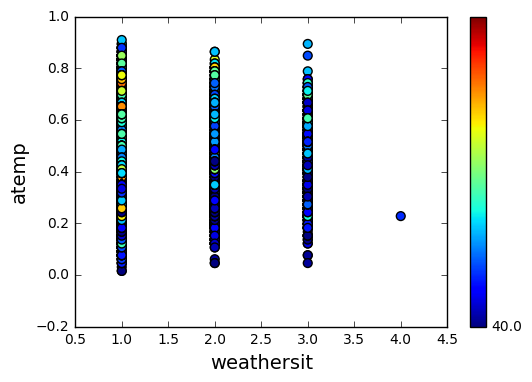

In [195]:
%pylab inline
idx_1 = 11 # index of the first feature to plot
idx_2 = 13 # index of the second feature to plot

# Scatterplot
plt.scatter(X[:, idx_1], X[:, idx_2], s=40, c=y)

formatter = plt.FuncFormatter(lambda i, *args: y[int(i)])
plt.colorbar(ticks=[0, 1], format=formatter)

plt.xlabel(Xl[idx_1], fontsize=14)
plt.ylabel(Xl[idx_2], fontsize=14)

In [141]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Fitting our model on log(1+y) may give better results because assessment is RMSLE
#log_y = np.array(np.log(1+y), dtype=np.float_)

gnb.fit(X, y)

pred = gnb.predict(X)

In [142]:
#Calculating the result: RMSLE

n_samples, n_features = X.shape

# \epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }

def sle(actual, predicted):
    return (np.power(np.log(np.array(actual)+1) - np.log(np.array(predicted)+1), 2))

def msle(actual, predicted):
    return np.mean(sle(actual, predicted))

def rmsle(actual, predicted):
    return np.sqrt(msle(actual, predicted))

rmsle(y,pred)

1.6579950391742981

In [143]:
# Set up a stratified 10-fold cross-validation
from sklearn import cross_validation
folds = cross_validation.StratifiedKFold(y, 10, shuffle=True)

In [144]:
# This is one way to access the training and test points
for ix, (tr, te) in enumerate(folds):
    print "Fold %d" % ix
    print "\t %d training points" % len(tr)
    print "\t %d test points" % len(te)

Fold 0
	 9638 training points
	 1248 test points
Fold 1
	 9672 training points
	 1214 test points
Fold 2
	 9712 training points
	 1174 test points
Fold 3
	 9741 training points
	 1145 test points
Fold 4
	 9798 training points
	 1088 test points
Fold 5
	 9831 training points
	 1055 test points
Fold 6
	 9847 training points
	 1039 test points
Fold 7
	 9877 training points
	 1009 test points
Fold 8
	 9915 training points
	 971 test points
Fold 9
	 9943 training points
	 943 test points


In [145]:
y_pred_cv = np.zeros(y.shape)

for ix, (tr, te) in enumerate(folds):
    gnb.fit(X[tr],y[tr])
    y_pred_cv[te]=gnb.predict(X[te])

In [130]:
#Cross Validated RMSLE
rmsle(y, y_pred_cv)

1.651149200200384